### Arbitrary Value Imputation

It consists of replacing the NAN value with an arbitrary value.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
def impute_nan(df,variable):
    df[variable+"_hundred"]=df[variable].fillna(100)

### Advantages

1. Easy to implement
2. Captures the importances of missingness if there is one


### Disadvantages

1. Distorts the original distribution of the variable
2. if missingness is not important, it may mask the predictive power of the original variable by distorting the distribution
3. Hard to decide which value to use

### How to handle categorical missing value

### Frequent category imputation

In [5]:
load_df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
load_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [6]:
load_df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

<Axes: xlabel='BsmtQual'>

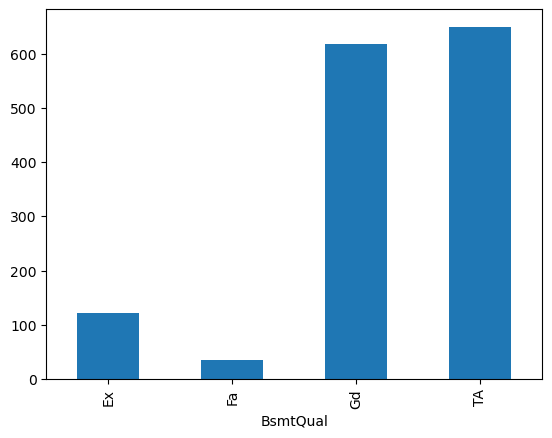

In [7]:
load_df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

In [8]:
load_df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [9]:
### Replacing function
def impute_fn(load_df,variable):
    most_frq=load_df[variable].value_counts().index[0]    
    load_df[variable]=load_df[variable].fillna(most_frq)

In [10]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_fn(load_df,feature)

In [11]:
load_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
load_df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Advantages

1. Easy to implement
2. Faster way to implement

### Disadvantages

1. Since we are using most frequent labels, it may use them in a over repersented way it there are many
2. It distorts the relationship of most frequent lables.  

### Adding variable to capture NAN

In [13]:
load_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [14]:
load_df['BsmtQual_Var']=np.where(load_df['BsmtQual'].isnull(),1,0)

In [15]:
load_df.head(50)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,Gd,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,Gd,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


## suppose if you have more frequent categories we just replace nan with a new category 

In [3]:
load_df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
load_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
def impute_nan(df,variable):
    load_df[variable+"newvar"]=np.where(load_df[variable].isnull(),"Missing",load_df[variable])

In [7]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(load_df,feature)

In [10]:
load_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,GarageTypenewvar,FireplaceQunewvar
0,Gd,NaN,Attchd,208500,Gd,Attchd,Missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [12]:
load_df=load_df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [13]:
load_df.head()

,SalePrice,BsmtQualnewvar,GarageTypenewvar,FireplaceQunewvar
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
